In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [2]:
# Area (A): The area of a bean zone and the number of pixels within its boundaries.
# Perimeter (P): Bean circumference is defined as the length of its border.
# Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
# Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
# Aspect ratio (K): Defines the relationship between L and l.
# Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
# Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
# Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
# Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
# Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
# Roundness (R): Calculated with the following formula: (4piA)/(P^2)
# Compactness (CO): Measures the roundness of an object: Ed/L

In [3]:
data=pd.read_excel("C:/Users/Yahya/OneDrive/Desktop/DryBean.xlsx")
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
data.duplicated().sum()

68

In [7]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [8]:
print("Bean Classes and Count of Occurences:","\n",data['Class'].value_counts().sort_values(ascending=False))

Bean Classes and Count of Occurences: 
 DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


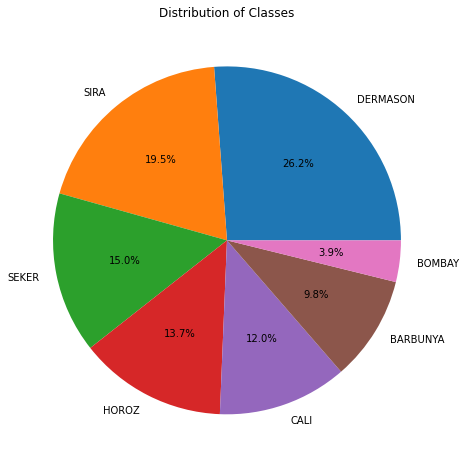

In [9]:
plt.figure(figsize=(8, 8))
data['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.ylabel('')
plt.show()

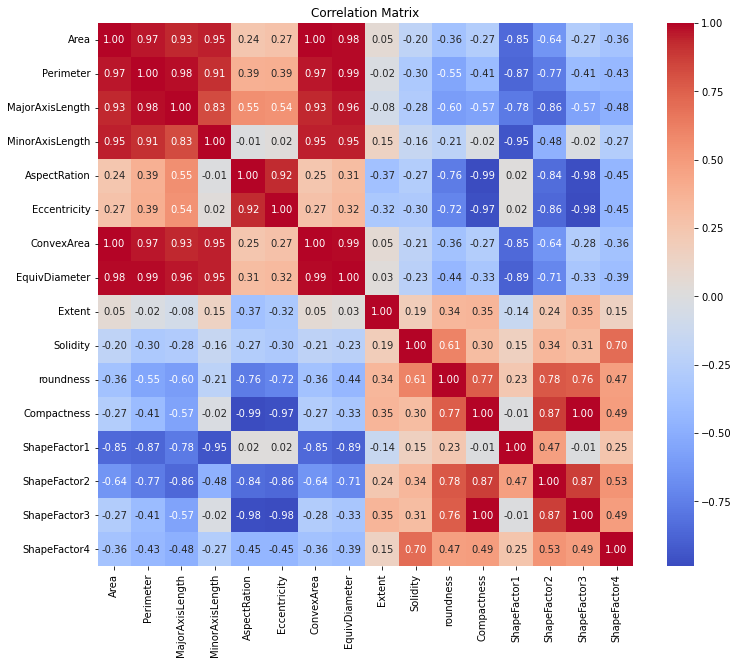

In [10]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']


In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

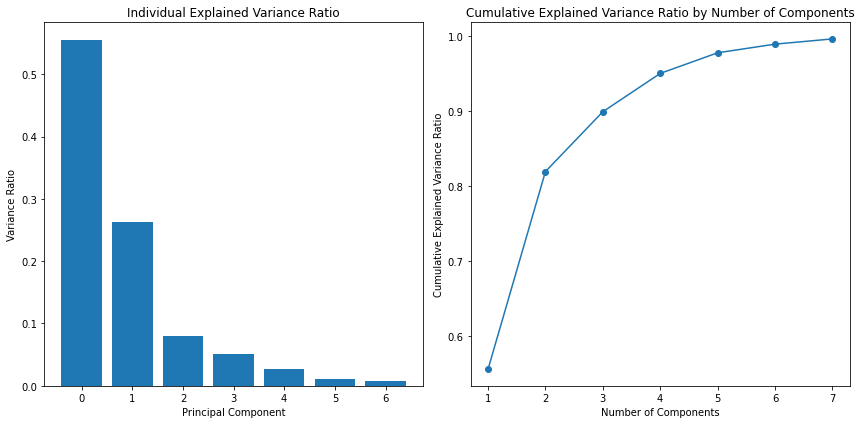

In [27]:
plt.figure(figsize=(12, 6))

# Bar plot for individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Individual Explained Variance Ratio')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')

plt.tight_layout()
plt.show()


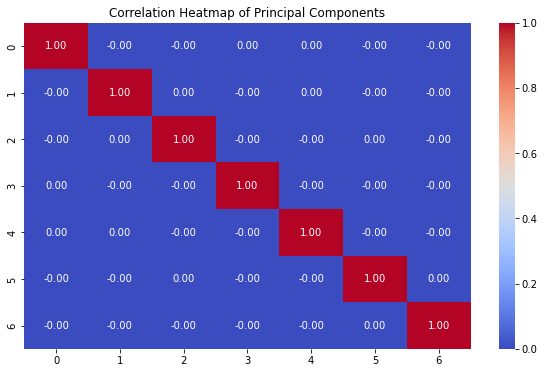

In [33]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_pca).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Principal Components')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

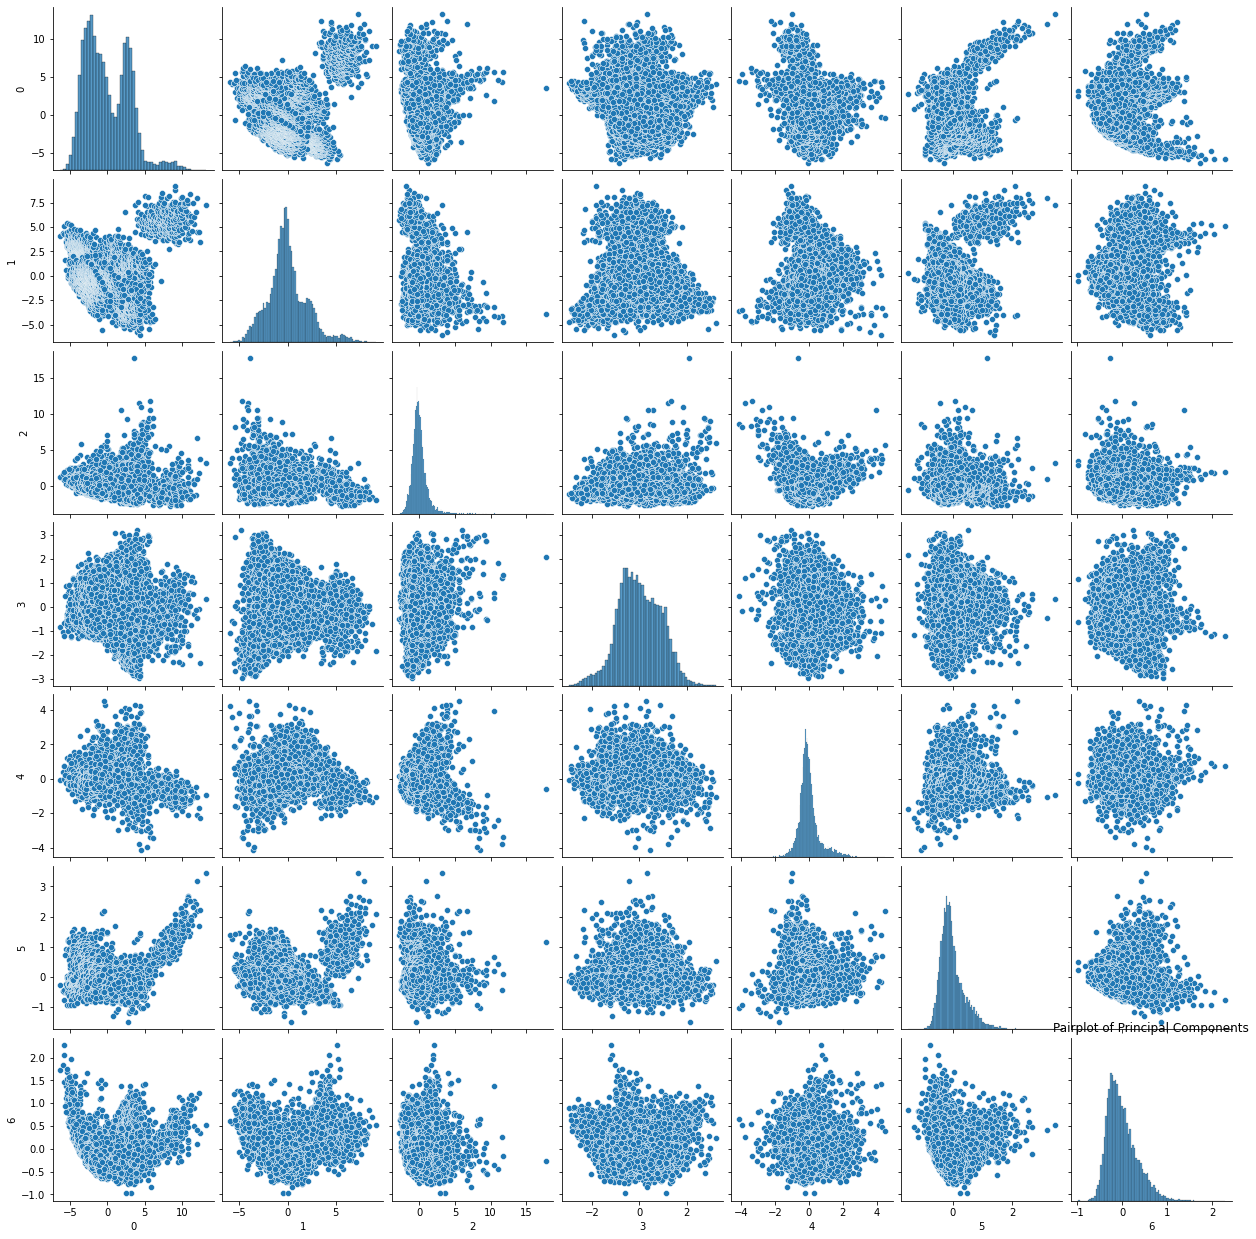

In [29]:
# Visualize feature distributions after PCA
sns.pairplot(pd.DataFrame(X_pca))
plt.title('Pairplot of Principal Components')
plt.show()

In [ ]:
# Define grid search parameters for each kernel
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4, 5]}


In [16]:
# Perform GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.926 total time=   0.7s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.927 total time=   0.6s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.922 total time=   0.5s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.925 total time=   0.8s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.928 total time=   0.6s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.869 total time=   5.6s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.878 total time=   5.4s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.881 total time=   4.9s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.883 total time=   4.7s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.885 total time=   4.8s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.925 total time=   0.8s
[CV 2/5

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [17]:
# Print best parameters
print("\nBest Parameters Found:")
print(grid.best_params_)


Best Parameters Found:
{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [18]:
svm_model = grid.best_estimator_

In [19]:
predictions = svm_model.predict(X_test)

In [20]:
# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[237   0  14   0   0   1   7]
 [  0 114   0   0   0   0   0]
 [  8   0 293   0   1   1   2]
 [  0   0   0 656   0  10  41]
 [  0   0   7   5 359   0   5]
 [  4   0   0   8   0 393   9]
 [  1   0   0  42   8   7 476]]


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.93      0.96      0.95       305
    DERMASON       0.92      0.93      0.93       707
       HOROZ       0.98      0.95      0.97       376
       SEKER       0.95      0.95      0.95       414
        SIRA       0.88      0.89      0.89       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



In [22]:
accuracy = accuracy_score(y_test, predictions) * 100
print("\nAccuracy:", accuracy)


Accuracy: 93.31856773717239


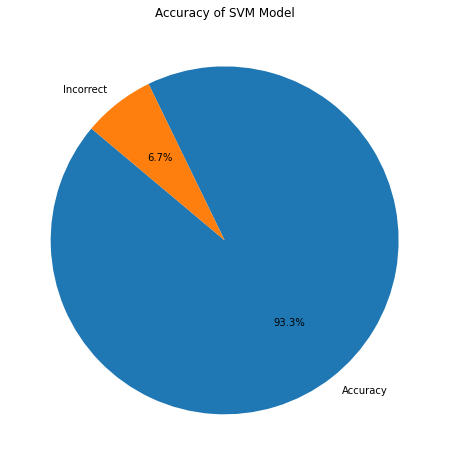

In [23]:
plt.figure(figsize=(8, 8))
plt.pie([accuracy, 100 - accuracy], labels=['Accuracy', 'Incorrect'], autopct='%1.1f%%', startangle=140)
plt.title('Accuracy of SVM Model')
plt.show()